<a href="https://colab.research.google.com/github/humayun-mhk/Scikit_learn_2/blob/main/Regression%20using%20Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Actual vs Predicted Values (First 10 examples):
    Actual  Predicted
0  0.47700   1.218429
1  0.45800   1.582832
2  5.00001   2.108453
3  2.18600   2.674120
4  2.78000   2.054126
5  1.58700   2.251245
6  1.98200   2.592771
7  1.57500   2.089645
8  3.40000   2.199075
9  4.46600   3.797673

Mean of Actual House Prices: 2.0550030959302323
Mean of Predicted House Prices: 2.0547540322796918

Mean Squared Error: 0.6796
R² Score:

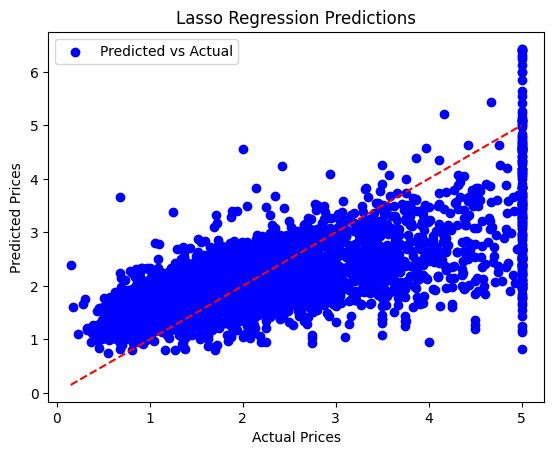

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target  # Target variable (house prices)

# Print first 5 rows of dataset
print("First 5 rows of dataset:")
print(X.head())

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for Lasso Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso Regression Model
lasso = Lasso(alpha=0.1)  # Regularization strength (lambda)
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso.predict(X_test_scaled)

# Print first 10 actual vs predicted values
comparison_df = pd.DataFrame({"Actual": y_test[:10], "Predicted": y_pred[:10]})
print("\nActual vs Predicted Values (First 10 examples):")
print(comparison_df)

# Compare mean actual vs. mean predicted values
print("\nMean of Actual House Prices:", np.mean(y_test))
print("Mean of Predicted House Prices:", np.mean(y_pred))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Display Lasso Coefficients (important for feature selection)
print("\nLasso Coefficients:")
print(pd.Series(lasso.coef_, index=X.columns))

# Plot Predictions vs Actual Values
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression Predictions")
plt.legend()
plt.show()
